# Notebook Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [5]:
TOKEN_PROB_SPAM_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_PROB_NON_SPAM_FILE = 'SpamData/03_Testing/prob-non-spam.txt'
TOKEN_PROB_ALL_FILE = 'SpamData/03_Testing/prob-all.txt'

TEST_FEATURE_MATRIX_FILE = 'SpamData/03_Testing/test-feature.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

# Loadingg Data

In [6]:
X_test = np.loadtxt(TEST_FEATURE_MATRIX_FILE, delimiter=' ')
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

prob_token_spam = np.loadtxt(TOKEN_PROB_SPAM_FILE, delimiter=' ')
prob_token_non_spam = np.loadtxt(TOKEN_PROB_NON_SPAM_FILE, delimiter=' ')
prob_token_all = np.loadtxt(TOKEN_PROB_ALL_FILE, delimiter=' ')

# Calculating Joint Probability
## Dot Product

In [7]:
result = X_test.dot(prob_token_spam)

In [8]:
result.shape

(1722,)

In [9]:
result[:5]

array([0.4302921 , 0.14521406, 0.14597035, 0.37475771, 0.23563321])

# Set the Prior
### $$ P(Spam \, | X) \, = \frac{P(X \, | Spam) \, P(Spam)} {P(X)} $$

In [10]:
PROB_SPAM = 0.3108175473579262

In [11]:
# Since the number are very small and very close to each other, is best idea to use log(pprob)
np.log(prob_token_spam)

array([ -4.41449158,  -5.25180856,  -5.00061297, ..., -11.3992079 ,
       -12.09235508,  -9.78976999])

## Joint Prob in Log Format

In [12]:
join_log_prob_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_token_all)) + np.log(PROB_SPAM)

In [13]:
join_log_prob_spam[:5]

array([24.2765723 ,  2.13318018, 20.62661581, 17.85831187, 20.5955132 ])

### $$ P(Non-Spam \, | X) \, = \frac{P(X \, | Spam) \, 1 - P(Spam)} {P(X)} $$

In [14]:
join_log_prob_non_spam = X_test.dot(np.log(prob_token_non_spam) - np.log(prob_token_all)) + np.log(1 - PROB_SPAM)

In [15]:
join_log_prob_non_spam[:5]

array([-60.92344335, -10.99168171, -37.99817697, -59.21508681,
       -53.85271371])

## Simplification

In [16]:
join_log_prob_non_spam = X_test.dot(np.log(prob_token_non_spam)) + np.log(1 - PROB_SPAM)
join_log_prob_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)

## Making Predictions
### Comparing if:
$$ P(Spam \, | \, X) \, > \, P(Non-Spam \, | \, X) $$

In [17]:
predictons = join_log_prob_spam > join_log_prob_non_spam

In [18]:
predictons[-5:]

array([ True, False, False, False, False])

In [19]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

## Metrics and Evaluation
### Accuracy
- Note! -- -- This metric has problem when dealing with imbalance data

In [20]:
correct_docs = (y_test == predictons).sum()
print('Docs Classified Correctly', correct_docs)

numdocs_wrong = (y_test != predictons).sum()
print('Docs Classified Incorrect ', numdocs_wrong)

Docs Classified Correctly 1683
Docs Classified Incorrect  39


In [21]:
# Accuracy
accuracy = correct_docs / len(X_test)
accuracy

0.9773519163763066

# Visualisation

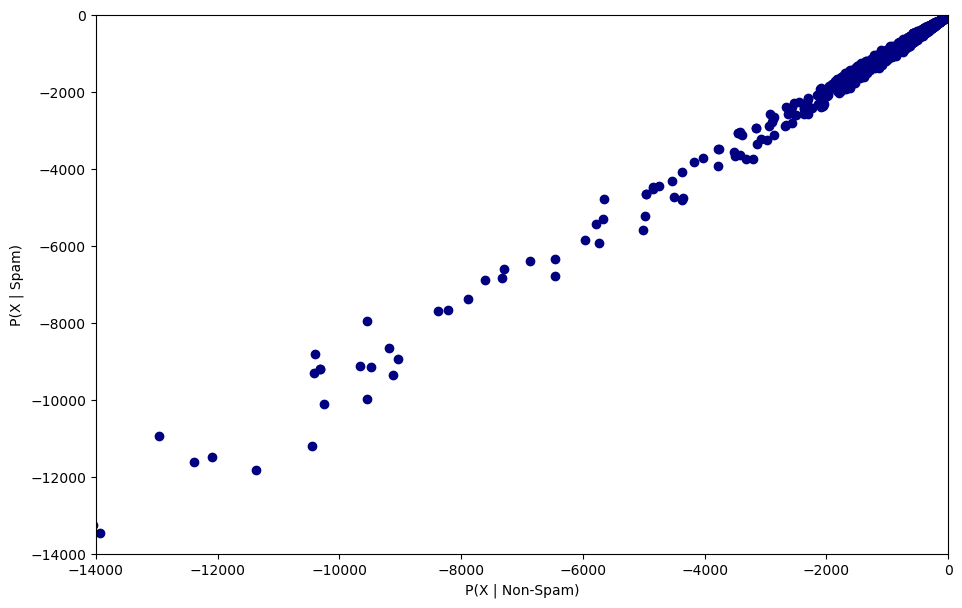

In [24]:

plt.figure(figsize=[11, 7])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(join_log_prob_non_spam, join_log_prob_spam, color='navy')
plt.show()

In [23]:
xlabel = 'P(X | Non-Spam)'
ylabel = 'P(X | Spam)'
linedata = np.linspace(start=-14000, stop=1, num=1000)

## The Descion Boundary Line

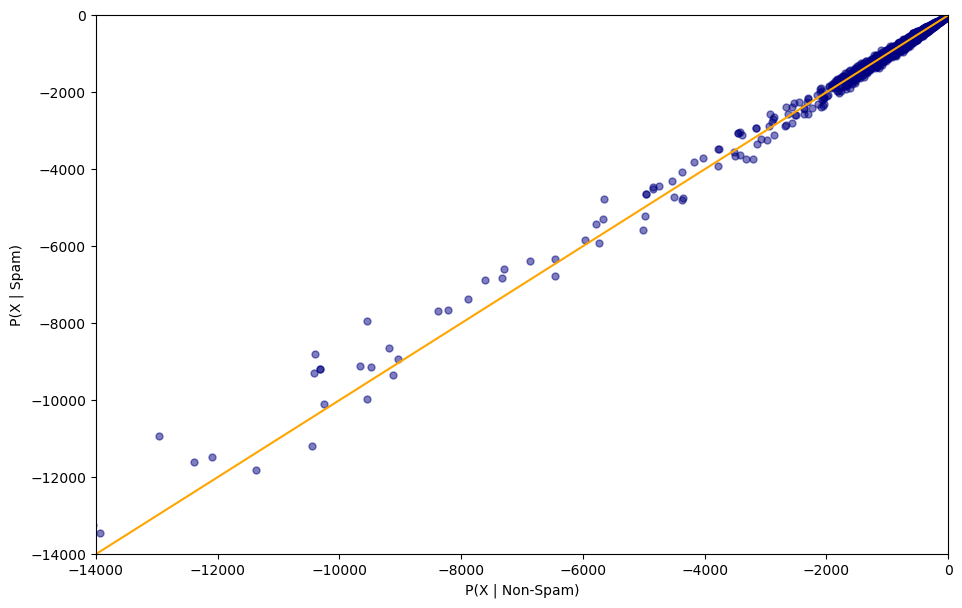

In [87]:

plt.figure(figsize=[11, 7])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(join_log_prob_non_spam, join_log_prob_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')
plt.show()

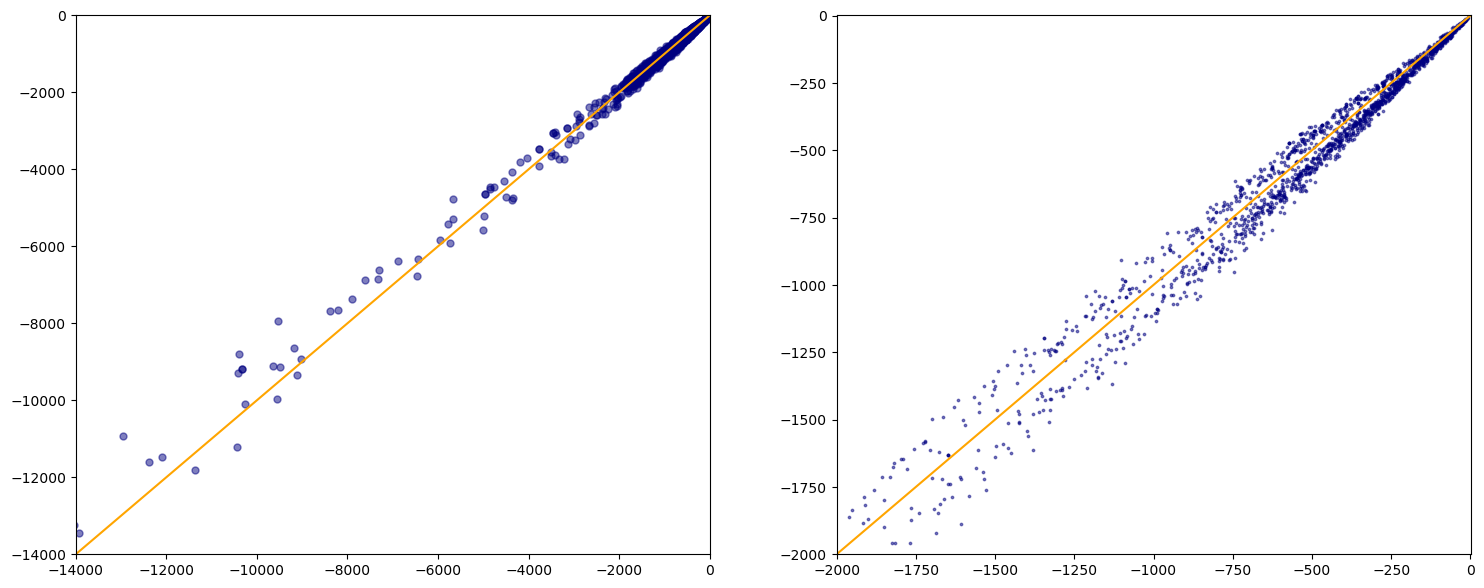

In [94]:
plt.figure(figsize=[18, 7])
plt.xlabel(xlabel)
plt.ylabel(ylabel)


plt.subplot(1, 2, 1)
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])
plt.scatter(join_log_prob_non_spam, join_log_prob_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.subplot(1, 2, 2)
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])
plt.scatter(join_log_prob_non_spam, join_log_prob_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')

plt.show()

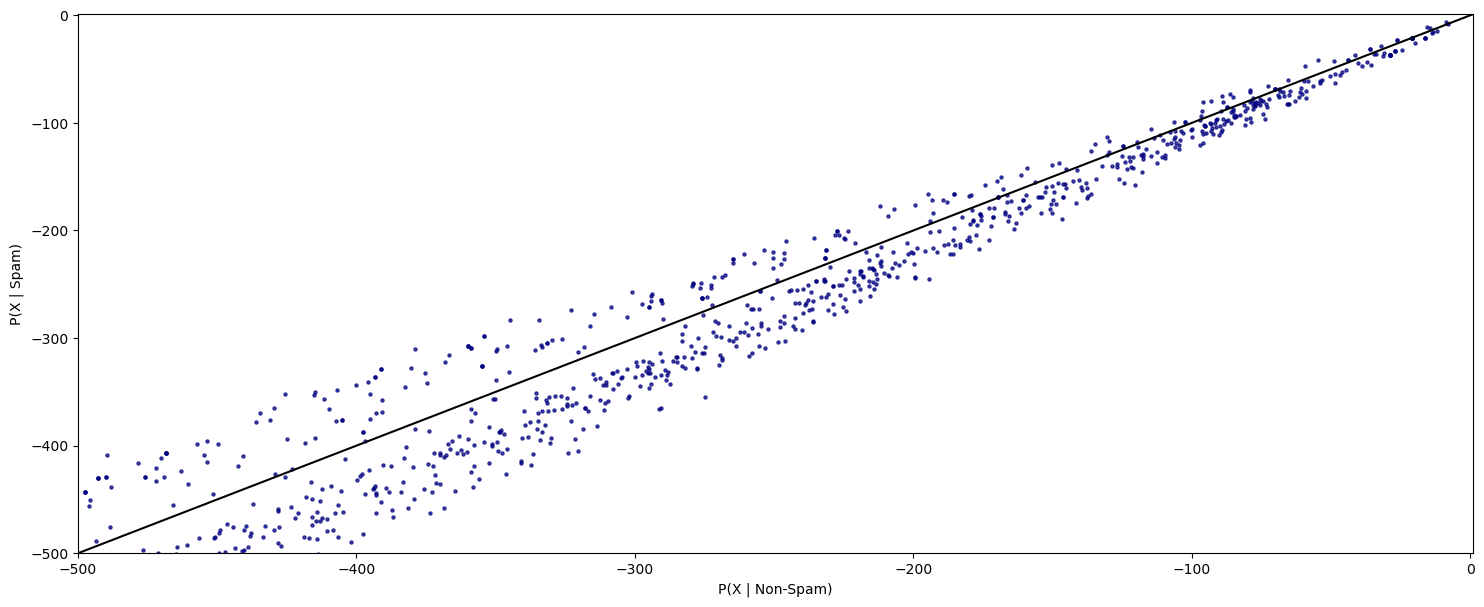

In [99]:
plt.figure(figsize=[18, 7])
plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.xlim([-500, 1])
plt.ylim([-500, 1])
plt.scatter(join_log_prob_non_spam, join_log_prob_spam, color='navy', alpha=0.7, s=5)
plt.plot(linedata, linedata, color='black')

## False Positives and False Negatives

In [101]:
np.unique(predictons, return_counts=True) # show how many times the model classify email as spam or non-spam

(array([False,  True]), array([1136,  586], dtype=int64))

In [102]:
true_pos = (y_test == 1) & (predictons == 1) # the model correctly classify a spam email as a spam one.
true_pos.sum()

567

In [104]:
false_pos = (y_test == 0) & (predictons == 1) # the model suggest that an email is spam while actually is not.
false_pos.sum()

19

In [105]:
false_neg = (y_test == 1) & (predictons == 0) # the model suggest that an email is not spam while actually it is.
false_neg.sum()

20

## Recall Score
$$ Recall = \frac{True \, Positive} {True \, Positive + False \, Negative} $$
- This is measure of how many spam emais the model classify compared to how many spam emails are there in the dataset
- Note! -- -- Is very easy to manipulate recall Score by making "False Negative" a very small number so that to have higher score

In [121]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('The Recall Score is {:.2%}'.format(recall_score))

The Recall Score is 96.59%


## Precision
$$ Precision = \frac{True \, Positive} {True \, Positive + False \, Positive} $$

In [124]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('The Recall Score is {:.3}'.format(precision_score))

The Recall Score is 0.968


## F-Score
- The harmonic mean (or Average) of both Precision and Recall
$$ F-Score = 2 \times \frac{Precision \times Recall}{Precision + Recall} $$

In [127]:
f_score = 2 * precision_score * recall_score / (precision_score + recall_score)
print('The F-Score is {:.3}'.format(f_score))

The F-Score is 0.967
